In [1]:
import pandas as pd
import matplotlib.pyplot as pt

In [2]:
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',names=['s_len','s_wid','p_len','p_wid','species'])

In [3]:
data

,s_len,s_wid,p_len,p_wid,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.describe()

,s_len,s_wid,p_len,p_wid
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   s_len    150 non-null    float64
 1   s_wid    150 non-null    float64
 2   p_len    150 non-null    float64
 3   p_wid    150 non-null    float64
 4   species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
mapp={'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
data['species']=data.species.map(mapp)

In [8]:
data['species'].unique()

array([0, 1, 2])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   s_len    150 non-null    float64
 1   s_wid    150 non-null    float64
 2   p_len    150 non-null    float64
 3   p_wid    150 non-null    float64
 4   species  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [10]:
data

,s_len,s_wid,p_len,p_wid,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
data.describe()

,s_len,s_wid,p_len,p_wid,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
from sklearn.preprocessing import StandardScaler
stand=StandardScaler()
features=data.loc[:,'s_len':'p_wid']
out=data.loc[:,'species']
features=stand.fit_transform(features)
features=pd.DataFrame(features,columns=['s_len','s_wid','p_len','p_wid'])

In [13]:
#perform exploratory data analysis
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,out,random_state=30,test_size=0.2)

In [14]:
train=pd.concat([x_train,y_train],axis='columns')
train.describe()

,s_len,s_wid,p_len,p_wid,species
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,0.049477,0.029311,0.034878,0.042290,1.025000
std,0.993603,1.016587,0.995224,0.994981,0.814393
min,-1.870024,-2.438987,-1.568735,-1.444450,0.000000
25%,-0.900681,-0.587764,-1.227541,-1.082899,0.000000
50%,-0.052506,-0.124958,0.393132,0.264699,1.000000
75%,0.795669,0.627102,0.762759,0.790591,2.000000
max,2.492019,3.114684,1.786341,1.710902,2.000000


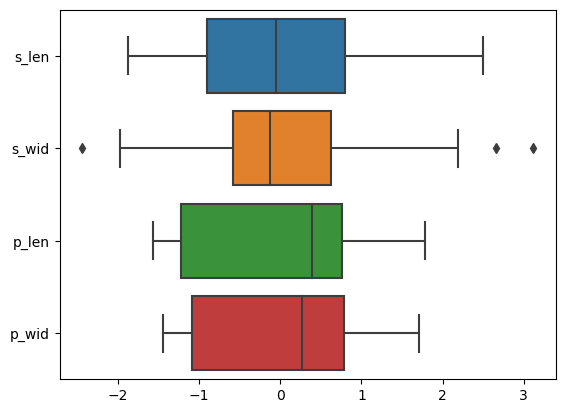

In [15]:
import seaborn as sb
sb.boxplot(x_train,orient='h')
pt.show()

In [16]:
import numpy as np
def outlier_check(X):
    q1=np.quantile(train['s_wid'],0.25)
    q3=np.quantile(train['s_wid'],0.75)
    iqr=q3-q1
    med=train['s_wid'].median()
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    outlier=train[(train['s_wid']>upper) | (train['s_wid']<lower)]
    outlier_index=train[(train['s_wid']>upper) | (train['s_wid']<lower)].index
    return outlier,outlier_index.tolist()

In [17]:
outlier,outliers_index=outlier_check(train['s_wid'])
print(outliers_index)

[60, 33, 15]


In [18]:
train_or=train.copy()
train=train.drop(outliers_index)
train=train.reset_index()
train=train.drop(columns=['index'])
train

,s_len,s_wid,p_len,p_wid,species
0,1.280340,0.106445,0.933356,1.185010,2
1,-0.416010,-1.513375,-0.033361,-0.261193,1
2,1.159173,-0.124958,0.990221,1.185010,2
3,0.310998,-0.124958,0.649027,0.790591,2
4,2.249683,-1.050569,1.786341,1.447956,2
...,...,...,...,...,...
112,-0.416010,-1.744778,0.137236,0.133226,1
113,1.886180,-0.587764,1.331416,0.922064,2
114,1.038005,0.106445,1.047087,1.579429,2
115,-1.264185,-0.124958,-1.341272,-1.181504,0


In [19]:
x_train=train.loc[:,'s_len':'p_wid']
y_train=train.loc[:,'species']

In [20]:
y_train

0      2
1      1
2      2
3      2
4      2
      ..
112    1
113    2
114    2
115    0
116    0
Name: species, Length: 117, dtype: int64

In [21]:
train

,s_len,s_wid,p_len,p_wid,species
0,1.280340,0.106445,0.933356,1.185010,2
1,-0.416010,-1.513375,-0.033361,-0.261193,1
2,1.159173,-0.124958,0.990221,1.185010,2
3,0.310998,-0.124958,0.649027,0.790591,2
4,2.249683,-1.050569,1.786341,1.447956,2
...,...,...,...,...,...
112,-0.416010,-1.744778,0.137236,0.133226,1
113,1.886180,-0.587764,1.331416,0.922064,2
114,1.038005,0.106445,1.047087,1.579429,2
115,-1.264185,-0.124958,-1.341272,-1.181504,0


<Axes: >

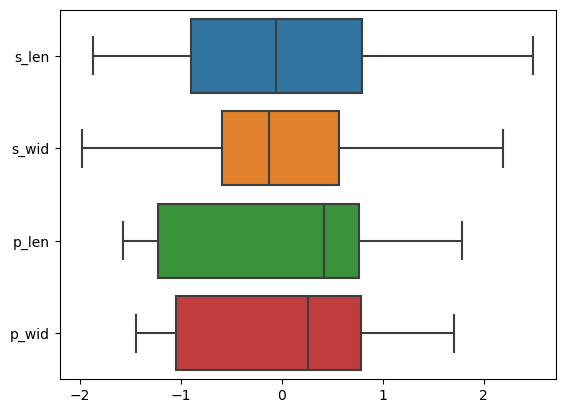

In [22]:
sb.boxplot(x_train,orient='h')

<Axes: xlabel='p_wid', ylabel='Count'>

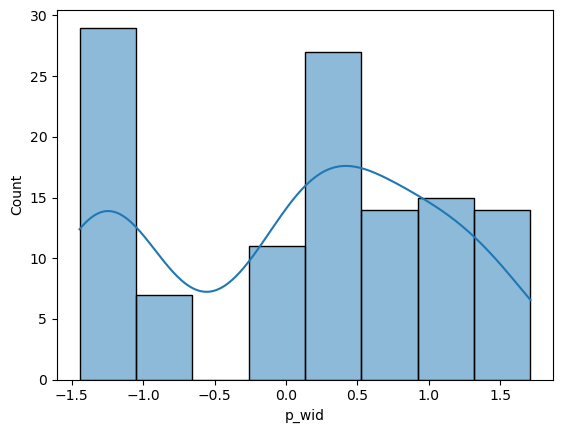

In [23]:
sb.histplot(x_train['p_wid'],kde=True)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model=LogisticRegression(random_state=35)
train

,s_len,s_wid,p_len,p_wid,species
0,1.280340,0.106445,0.933356,1.185010,2
1,-0.416010,-1.513375,-0.033361,-0.261193,1
2,1.159173,-0.124958,0.990221,1.185010,2
3,0.310998,-0.124958,0.649027,0.790591,2
4,2.249683,-1.050569,1.786341,1.447956,2
...,...,...,...,...,...
112,-0.416010,-1.744778,0.137236,0.133226,1
113,1.886180,-0.587764,1.331416,0.922064,2
114,1.038005,0.106445,1.047087,1.579429,2
115,-1.264185,-0.124958,-1.341272,-1.181504,0


In [26]:
train_or

,s_len,s_wid,p_len,p_wid,species
139,1.280340,0.106445,0.933356,1.185010,2
81,-0.416010,-1.513375,-0.033361,-0.261193,1
112,1.159173,-0.124958,0.990221,1.185010,2
127,0.310998,-0.124958,0.649027,0.790591,2
118,2.249683,-1.050569,1.786341,1.447956,2
...,...,...,...,...,...
53,-0.416010,-1.744778,0.137236,0.133226,1
130,1.886180,-0.587764,1.331416,0.922064,2
140,1.038005,0.106445,1.047087,1.579429,2
45,-1.264185,-0.124958,-1.341272,-1.181504,0


In [27]:
model

LogisticRegression(random_state=35)

In [28]:
model.fit(x_train,y_train)

LogisticRegression(random_state=35)

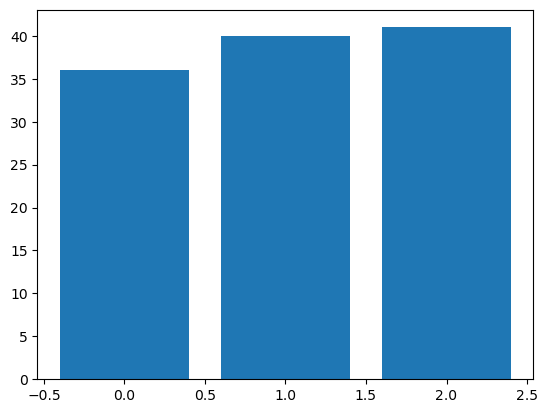

array([36, 40, 41])

In [29]:
y_train_predict=model.predict(x_train)
nos,counts=np.unique(y_train,return_counts=True)
pt.bar(nos,counts)
pt.show()
counts

In [30]:
train.corr()

,s_len,s_wid,p_len,p_wid,species
s_len,1.000000,-0.092427,0.867599,0.809978,0.771678
s_wid,-0.092427,1.000000,-0.399333,-0.332428,-0.399893
p_len,0.867599,-0.399333,1.000000,0.960366,0.945098
p_wid,0.809978,-0.332428,0.960366,1.000000,0.955141
species,0.771678,-0.399893,0.945098,0.955141,1.000000


<Axes: >

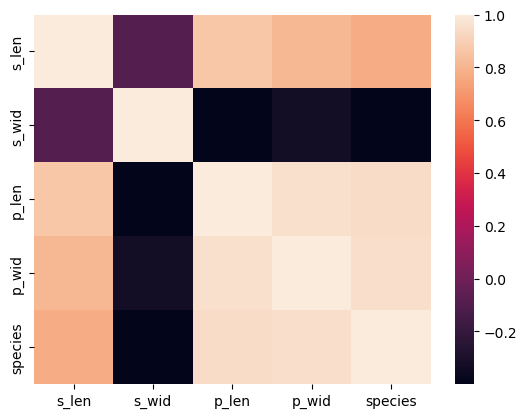

In [31]:
sb.heatmap(train.corr())

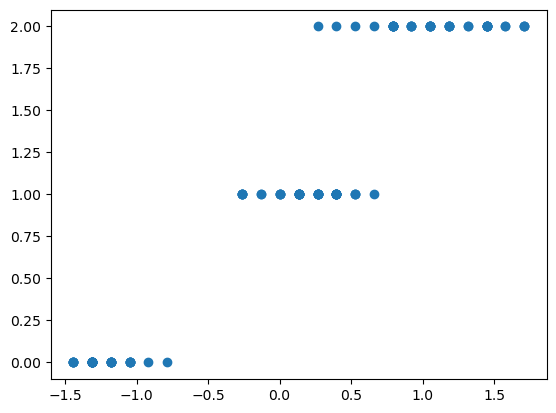

In [32]:
pt.scatter(x_train['p_wid'],y_train)

In [33]:
model

LogisticRegression(random_state=35)

In [34]:
y_train_predict

array([2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0,
       1, 0, 2, 2, 2, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 0, 2,
       2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 1, 2,
       1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1, 2,
       0, 2, 1, 2, 2, 0, 0])

In [35]:
nos,y_train_pcounts=np.unique(y_train_predict,return_counts=True)

<BarContainer object of 3 artists>

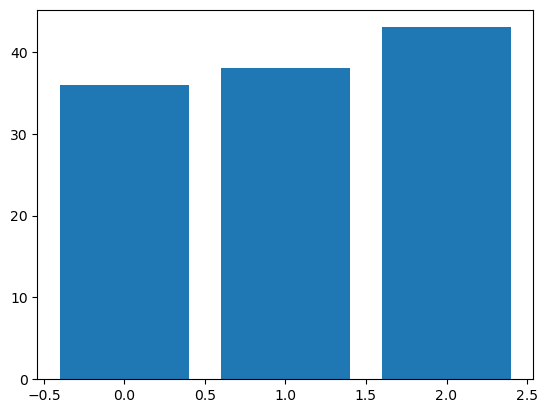

In [36]:
pt.bar(nos,y_train_pcounts)

In [37]:
print(counts)
print(y_train_pcounts)

[36 40 41]
[36 38 43]


In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [39]:
accuracy_train=accuracy_score(y_train,y_train_predict)
accuracy_train

0.9829059829059829

In [40]:
test_predict=model.predict(x_test)
accuracy_test=accuracy_score(y_test,test_predict)
accuracy_test

0.9333333333333333

In [41]:
train_metrix=confusion_matrix(y_train,y_train_predict)
test_metrix=confusion_matrix(y_test,test_predict)

In [42]:
print("Analysis")
print('train data:-')
print('Accuracy= ',accuracy_train)
print(train_metrix)
print('test data:-')
print("accuracy= ",accuracy_test)
print(test_metrix)

Analysis
train data:-
Accuracy=  0.9829059829059829
[[36  0  0]
 [ 0 38  2]
 [ 0  0 41]]
test data:-
accuracy=  0.9333333333333333
[[12  0  0]
 [ 0  8  1]
 [ 0  1  8]]


Text(0.5, 23.52222222222222, 'true')

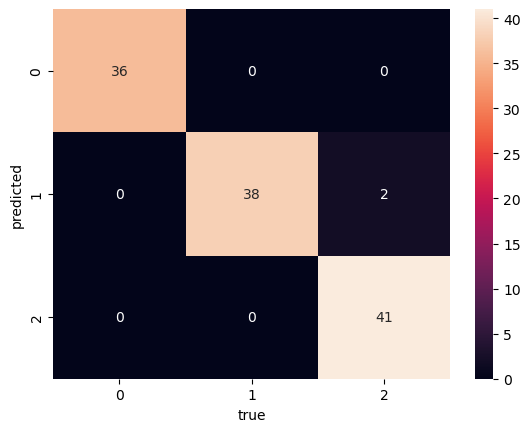

In [43]:
sb.heatmap(train_metrix,annot=True)
pt.ylabel('predicted')
pt.xlabel('true')

Text(50.722222222222214, 0.5, 'true')

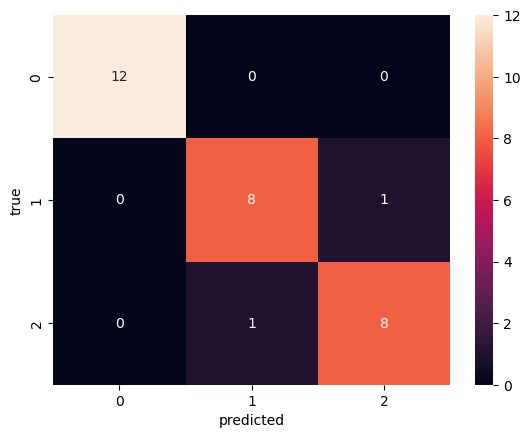

In [44]:
sb.heatmap(test_metrix,annot=True)
pt.xlabel('predicted')
pt.ylabel('true')

In [45]:
model_2=LogisticRegression(solver='saga',penalty=None,max_iter=4000,random_state=35)
model_2.fit(x_train,y_train)
out_train=model_2.predict(x_train)
train_metrix_2=confusion_matrix(y_train,out_train)
acc_train=accuracy_score(y_train,out_train)

out_test=model_2.predict(x_test)
test_metrix_2=confusion_matrix(y_test,out_test)
acc_test=accuracy_score(y_test,out_test)

In [46]:
print("Analysis")
print('train data:-')
print('Accuracy= ',acc_train)
print(train_metrix_2)
print('test data:-')
print("accuracy= ",acc_test)
print(test_metrix_2)

Analysis
train data:-
Accuracy=  0.9914529914529915
[[36  0  0]
 [ 0 39  1]
 [ 0  0 41]]
test data:-
accuracy=  0.9666666666666667
[[12  0  0]
 [ 0  9  0]
 [ 0  1  8]]


In [47]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2]), array([36, 40, 41]))

In [48]:
np.unique(out_train,return_counts=True)

(array([0, 1, 2]), array([36, 39, 42]))

In [49]:
np.unique(y_train_predict,return_counts=True)

(array([0, 1, 2]), array([36, 38, 43]))

Text(50.722222222222214, 0.5, 'true')

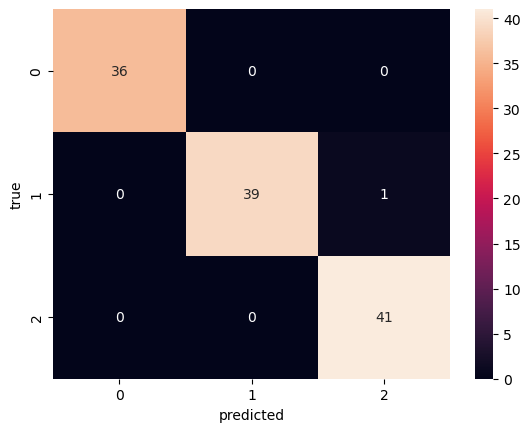

In [50]:
sb.heatmap(train_metrix_2,annot=True)
pt.xlabel('predicted')
pt.ylabel('true')

Text(50.722222222222214, 0.5, 'true')

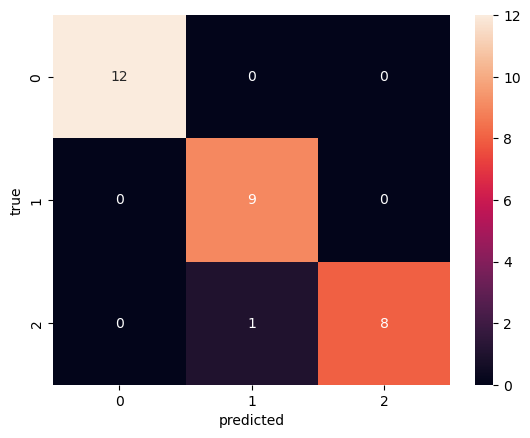

In [51]:
sb.heatmap(test_metrix_2,annot=True)
pt.xlabel('predicted')
pt.ylabel('true')

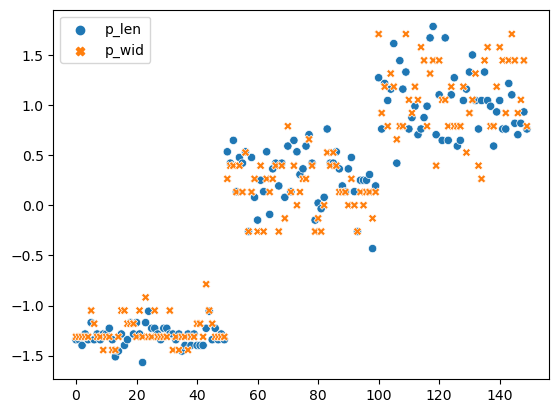

In [52]:
sb.scatterplot(features.loc[:,'p_len':'p_wid'])
pt.show()

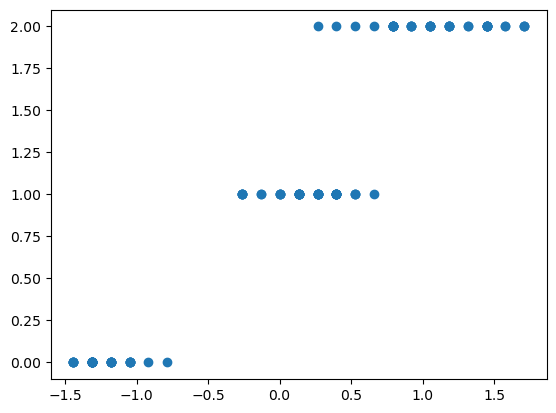

In [53]:
pt.scatter(x_train['p_wid'],y_train)

In [69]:
new_features=x_train.loc[:,'p_len':'p_wid']

In [70]:
m=LogisticRegression()
m.fit(new_features,y_train)
train_output=m.predict(new_features)

In [71]:
train_output

array([2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0,
       1, 0, 2, 2, 2, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 0, 2,
       2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 1, 2,
       1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2, 2, 0, 1, 1,
       0, 2, 1, 2, 2, 0, 0])

In [72]:
accuracy_score(y_train,train_output)

0.9658119658119658

In [74]:
v=x_test.loc[:,'p_len':'p_wid']
test_output=m.predict(v)

In [75]:
accuracy_score(y_test,test_output)

0.9333333333333333

In [78]:
test_output

array([0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 2, 2, 2, 2, 0, 1])

In [79]:
y_test

20     0
5      0
3      0
101    2
82     1
80     1
123    2
145    2
74     1
107    2
38     0
103    2
93     1
99     1
8      0
97     1
32     0
1      0
24     0
72     1
133    2
42     0
0      0
35     0
105    2
132    2
70     1
136    2
2      0
87     1
Name: species, dtype: int64

In [80]:
from sklearn.metrics import f1_score
f1_score(y_test,test_output)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].